In [176]:
import h5py as H
import numpy as np
import os, sys
import glob
import matplotlib as mpl
#mpl.use("Agg")
import pylab as plt
from sklearn.neighbors import KDTree
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
snapshot = 2
dir = "/str2/ando/gad/osaka/data_box/L205_N9_wmap0/"

f = dir+"groups_%03i/sub_%03i.*.hdf5"%(snapshot, snapshot)
sub_list = glob.glob(f)
f = dir+"snapshot_%03i/snapshot_%03i.*.hdf5"%(snapshot, snapshot)
snap_list = glob.glob(f)

reading... /str2/ando/gad/osaka/data_box/L205_N9_wmap0/groups_002/sub_002.0.hdf5
Group
   GroupContaminationCoun
   GroupContaminationMass
   GroupFirstSub
   GroupLen
   GroupMass
   GroupNsubs
   GroupOffset
   GroupPos
   Group_M_Crit200
   Group_M_Mean200
   Group_M_TopHat200
   Group_R_Crit200
   Group_R_Mean200
   Group_R_TopHat200
   Group_VelDisp_Crit200
   Group_VelDisp_Mean200
   Group_VelDisp_TopHat200
Header
IDs
   PID 
Subhalo
   SubhaloCM
   SubhaloGrNr
   SubhaloHalfmassRad
   SubhaloIDMostbound
   SubhaloLen
   SubhaloMass
   SubhaloOffset
   SubhaloParent
   SubhaloPos
   SubhaloSpin
   SubhaloVel
   SubhaloVelDisp
   SubhaloVmax
   SubhaloVmaxRad
reading... /str2/ando/gad/osaka/data_box/L205_N9_wmap0/groups_002/sub_002.1.hdf5
reading... /str2/ando/gad/osaka/data_box/L205_N9_wmap0/groups_002/sub_002.2.hdf5
reading... /str2/ando/gad/osaka/data_box/L205_N9_wmap0/groups_002/sub_002.3.hdf5
reading... /str2/ando/gad/osaka/data_box/L205_N9_wmap0/groups_002/sub_002.4.hdf5
rea

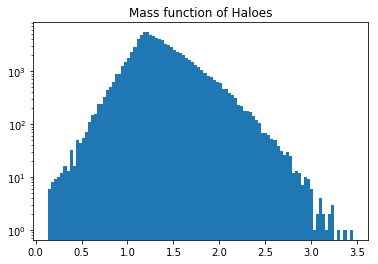

In [138]:
#
# read group catalog
#
Fwrite = True
GM_C200 = None
for sub in sub_list:
    print ("reading...", sub)
    d = H.File(sub, "r")
    #----#
    if ( Fwrite ):
        for k in d.keys():
            print (k)
            for item in d[k]:
                print ("  ", item)
    Fwrite = False
    #----#
    if ( GM_C200 is None ):
        GM_C200 = np.array(d["Group/Group_M_Crit200"])
        GR_C200 = np.array(d["Group/Group_R_Crit200"])
        GPos    = np.array(d["Group/GroupPos"])
        GLen    = np.array(d["Group/GroupLen"])
    else:
        GM_C200 = np.append(GM_C200, np.array(d["Group/Group_M_Crit200"]))
        GR_C200 = np.append(GR_C200, np.array(d["Group/Group_R_Crit200"]))
        GPos    = np.append(GPos   , np.array(d["Group/GroupPos"]), axis=0)
        GLen    = np.append(GLen   , np.array(d["Group/GroupLen"]))
    

mass_comp_limit = 10.**1.25
print ("mass_comp_limit=", mass_comp_limit)

#mask = np.isfinite(GM_C200)&(GM_C200>mass_comp_limit)
mask = np.isfinite(GM_C200)&(GM_C200>0.)

GM_C200 = GM_C200[mask]
GR_C200 = GR_C200[mask]
GLen    = GLen   [mask]
GPos    = GPos   [mask,:]

print (GM_C200.shape)
print (GM_C200.shape)
print (GPos.shape)
print (GLen.shape)
Ngrp = GPos.shape[0]

if ( True ):
    plt.hist(np.log10(GM_C200), bins=100)
    plt.yscale("log")
    plt.title("Mass function of Haloes")
    plt.show()

In [11]:
#
# read snapshot particles
#
ic = 0
GasPos = None
Fwrite = True
for snap in snap_list:
    d = H.File(snap, "r")
    print ("reading...", snap)
    #ic += 1
    #if ( ic > 2 ):
    #    continue

    #----#
    if ( Fwrite ):
        for k in d.keys():
            print (k)
            for item in d[k]:
                print ("  ", item)
    Fwrite = False
    #----#
    if ( GasPos is None ):
        GasPos  = np.array(d["PartType0/Coordinates"])
        HIfrac  = np.array(d["PartType0/HI"]         )
        GasMass = np.array(d["PartType0/Masses"]     )
    else:
        GasPos  = np.append(GasPos,  np.array(d["PartType0/Coordinates"]), axis=0)
        HIfrac  = np.append(HIfrac,  np.array(d["PartType0/HI"]         )        )
        GasMass = np.append(GasMass, np.array(d["PartType0/Masses"]     )        )

HIMass = HIfrac*GasMass

#
GasPos0 = GasPos[::1,:]
HIMass0 = HIMass[::1]
#

print (GasPos0.shape)
print (GPos.shape)

reading... /str2/ando/gad/osaka/data_box/L205_N9_wmap0/snapshot_002/snapshot_002.0.hdf5
Header
PartType0
   ArtificialViscosity
   CELibCalcium
   CELibCarbon
   CELibHelium
   CELibHydrogen
   CELibIron
   CELibMagnesium
   CELibNeon
   CELibNickel
   CELibNitrogen
   CELibOxygen
   CELibSilicon
   CELibSulfur
   Coordinates
   DI
   DII
   Density
   ElectronAbundance
   EnergyWeightedDensity
   H2I
   H2II
   HDI
   HI
   HII
   HM
   HeI
   HeII
   HeIII
   InternalEnergy
   Masses
   Metallicity
   MetallicitySmoothed
   ParticleIDs
   Pressure
   SNIICoolingFlag
   SNIIEndtime
   SNIIEnergyStorage
   SNIINocoolingTime
   SNIaCoolingFlag
   SNIaEndtime
   SNIaEnergyStorage
   SNIaNocoolingTime
   SmoothingLength
   StarFormationRate
   Temperature
   Velocities
   WindVelocity
   nStarSpwan
PartType1
   Coordinates
   ParticleIDs
   Velocities
PartType4
   AGBEndTime
   AGBExplosionTime
   AGBFeedbackFlag
   AGBStartTime
   CELibCalcium
   CELibCarbon
   CELibHelium
   CELibHydrog

In [16]:
#
# find nearest particles within Rv_c200
#
tree_T = KDTree(GasPos0, leaf_size=100, metric="euclidean")
ind, dist = tree_T.query_radius(GPos, r=GR_C200, return_distance=True, count_only=False)

In [137]:
#
# sum up HI mass for the member particles
#
HIMass_indiv = np.zeros(Ngrp)
for i in range(ind.shape[0]):
    HIMass_indiv[i] = np.sum(HIMass[ind[i]])

In [139]:
"""
rmin = 1e30
rmax = -1e30
for i in range(ind.shape[0]):
    m = dist[i]>0.
    if ( m[m].shape[0]>0 ):
        rmin = min(dist[i][m].min(), rmin)
    rmax = max(dist[i].max(), rmax)
print (rmin, rmax)
"""
print ()

In [134]:
#
# find nearest k-particles for given halo (more exact way of definition)
#
ind_q, dist_q = [], []
for i in range(GLen.shape[0]):
    dist_, ind_ = tree_T.query(GPos[i,:].reshape(1,3), k=GLen[i], return_distance=True)
    ind_q.append(ind_)
    dist_q.append(dist_)

In [135]:
#
# total HI mass based on the nearest k-particles definition
#
HIMass_indiv_exact = np.zeros(Ngrp)
for i in range(Ngrp):
    HIMass_indiv_exact[i] = np.sum(HIMass[ind_q[i]])

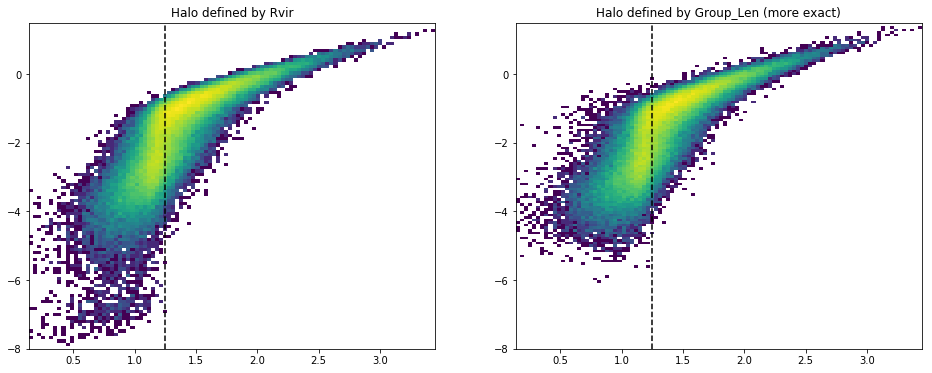

In [136]:
#
# compare Halo to HI mass relation with two different definitions
#
%matplotlib inline
fig = plt.figure(figsize=(16,6))
plt.subplot(121)
plt.hist2d(np.log10(GM_C200), np.log10(HIMass_indiv), bins=[100,100], norm=mpl.colors.LogNorm())
plt.axvline(x=np.log10(mass_comp_limit), color="k", ls="--")
plt.ylim(-8,1.5)
plt.title("Halo defined by Rvir")
plt.subplot(122)
plt.hist2d(np.log10(GM_C200), np.log10(HIMass_indiv_exact), bins=[100,100], norm=mpl.colors.LogNorm())
plt.axvline(x=np.log10(mass_comp_limit), color="k", ls="--")
plt.title("Halo defined by Group_Len (more exact)")
plt.ylim(-8,1.5)
plt.show()

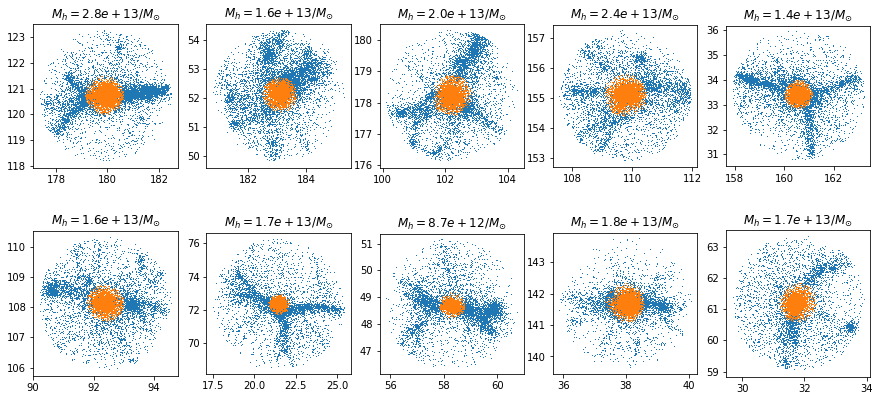

In [142]:
#
# have a glance of member particle spatial distribution for 10 example haloes.
#
id_offset = 0 #for most massive halo, id_offset=0; for least massive halo, id_offset=Ngrp-10
plt.figure(figsize=(15,7))
for i in range(id_offset,id_offset+10):
    plt.subplot(2,5,i+1-id_offset,aspect=1)
    plt.plot(GasPos[ind_q[i][0],0],GasPos[ind_q[i][0],1], "C0,")
    plt.plot(GasPos[ind  [i]   ,0],GasPos[ind  [i]   ,1], "C1,")
    plt.title(r"$M_h=%.1e /M_{\odot}$"%(GM_C200[i]*1e10))
plt.show()

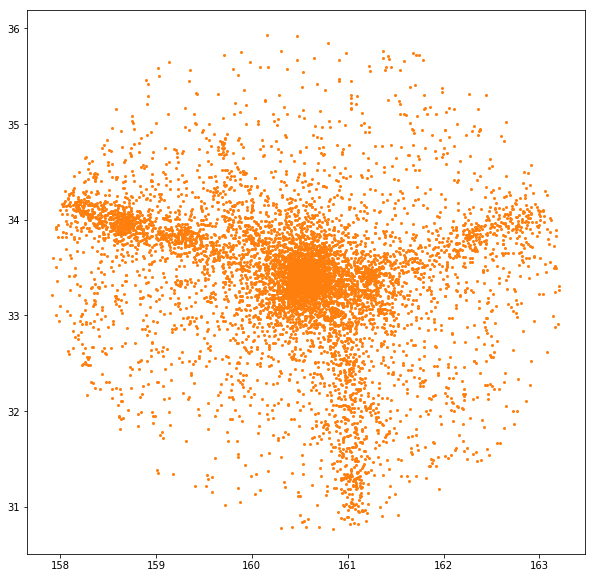

In [166]:
#
# close up one 
#
%matplotlib inline
plt.figure(figsize=(10,10))
i=4
m = ind_q[i][0]
#m = ind[i]
scale = HIMass[m]
scale = np.log10((scale-scale.min())/(scale.max()-scale.min())+0.001)+3
plt.plot(GasPos[m,0],GasPos[m,1], "C1o", ms=2)
plt.show()

<IPython.core.display.Javascript object>


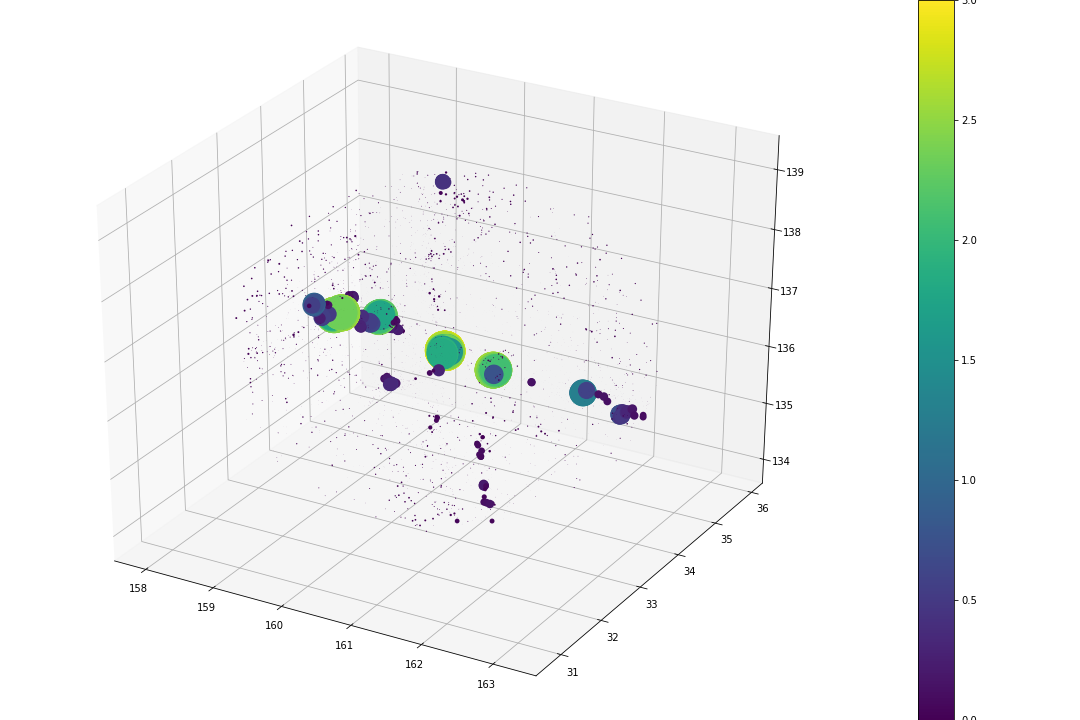

In [175]:
#
# graphically check where the HI clouds reside
# 
%matplotlib notebook
fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig)
sc = ax.scatter3D(GasPos[m,0],GasPos[m,1], GasPos[m,2], c=scale, edgecolor="none", s=scale*500)
fig.colorbar(sc)
#plt.show()

/home/atsushi/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


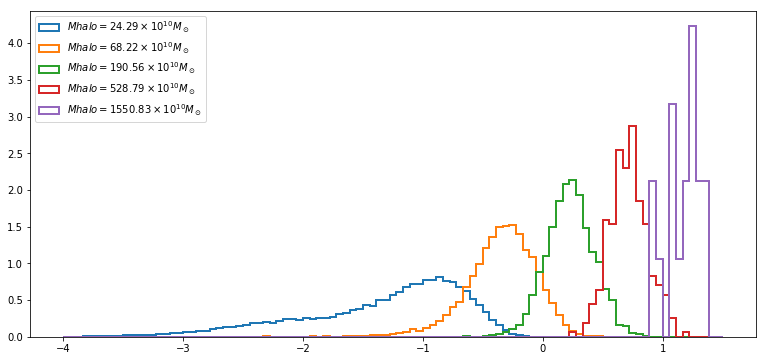

In [163]:
#
# derive conditional probability P(M_HI | M_halo)
#
%matplotlib inline
x = np.log10(GM_C200)
y = np.log10(HIMass_indiv_exact)
Nbin = 5
MHalo_bins = np.linspace(1.2,3.5,Nbin+1)
MHI_bins = np.linspace(-4,1.5, 100)
fig = plt.figure(figsize=(13,6))
for i in range(Nbin):
    m = (x>MHalo_bins[i])&(x<=MHalo_bins[i+1])
    mean = np.mean(x[m])
    plt.hist(y[m], bins=MHI_bins, label=r"$Mhalo=%.2f \times 10^{10}M_\odot$"%(10**mean), normed=True, histtype="step", lw=2)
plt.legend(loc="upper left")
plt.show()

In [192]:
def TNGfit(lnMhalo, M0, Mmin, alpha):
    Mhalo = np.exp(lnMhalo)
    lnM0 = np.log(M0)
    lnMmin = np.log(Mmin)
    return lnM0 + alpha*(lnMhalo-lnMmin) - (Mmin/Mhalo)**0.35

In [416]:
def fit_3DGrid(func, dx, dy, ds, pmin, pmax, Ngrid):
    chisq_min = 1e30
    p_best = [0., 0., 0.]
    for i1 in range(Ngrid):
        p0 = np.random.uniform(pmin[0], pmax[0])
        for i2 in range(Ngrid):
            p1 = np.random.uniform(pmin[1], pmax[1])
            for i3 in range(Ngrid):
                p2 = np.random.uniform(pmin[2], pmax[2])
                p = [p0, p1, p2]
                chisq = np.sum((func(dx, *p)-dy)**2/ds**2)
                if ( chisq < chisq_min ):
                    p_best = p
                    chisq_min = chisq
        sys.stdout.write("\r %i %f %f %f %f"%(i1+1, chisq_min, *p_best))
    return p_best

In [342]:
def engage_params(p, pmin, pmax):
    Np = len(p)
    for i in range(Np):
        if ( p[i] < pmin[i] ):
            p[i] = pmin[i] + (pmin[i]-p[i])
        if ( p[i] > pmax[i] ):
            p[i] = pmax[i] - (p[i]-pmax[i])
        #p[i] = max(p[i], pmin[i])
        #p[i] = min(p[i], pmax[i])
    return p

In [373]:
def fit_MCMC(func, dx, dy, p0, sigma0, Nchains, pmin, pmax, ds=None):
    if ( ds is None ):
        ds = np.zeros_like(dx)
    Np = len(p0)
    sigma = sigma0
    p_current = p0
    lnL_current = -5e30
    #
    accept = 0
    trial = 0
    Pv = np.empty((Nchains,Np))
    kB = 1.
    T = 1e5
    frac = 1.0
    #
    for i in range(Nchains):
        sigma = sigma0*frac
        p_propose = np.random.normal(loc=p_current, scale=sigma, size=Np)
        p_propose = engage_params(p_propose, pmin, pmax)
        lnL_propose = -np.sum((func(dx, *p_propose)-dy)**2/ds**2)/2.
        ratio = np.exp(lnL_propose -lnL_current)
        if ( ratio >= 1. ):
            p_current = p_propose
            Pv[accept] = p_propose
            lnL_current = lnL_propose
            
            accept += 1
            frac = 1.
            
        else:
            r = np.random.rand()
            if ( ratio > r ):
                p_current = p_propose
                Pv[accept] = p_propose
                lnL_current = lnL_propose
                accept += 1
        
        T = T**(1.-float(trial)/Nchains)
        frac = min(np.exp(-ratio/kB*T), 1.) # ... simulated annealing
        trial += 1
        sys.stdout.write("\r %i / %i accept ratio=%.5f : annealing=%.2f"%(accept, trial, 1.*accept/(1.*trial), frac))
    return Pv[:accept,:]

In [444]:
#
# generate data for fitting
#
m = x>1.2
dx = np.log(GM_C200[m])
dy = np.log(HIMass_indiv_exact[m])
dx0 = np.linspace(np.log(GM_C200[m].min()), np.log(GM_C200[m].max()), 15)
dy0 = np.zeros(len(dx0)-1)
ds0 = np.zeros(len(dx0)-1)
for i in range(len(dx0)-1):
    mq = (dx>dx0[i])&(dx<=dx0[i+1])
    dy0[i] = np.median(dy[mq])
    ds0[i] = np.std(dy[mq])
dx0 = dx0[:-1]
dx0 += (dx0[1]-dx0[0])/2.
#
p0 = [3, 500, 0.24]
#
fit_method = 2
#
#
# -- by scipy module
#
if ( fit_method == 0):
    popt, cov = curve_fit(TNGfit, dx, dy, p0=p0)

pmin = np.array([0, 20, 0.0])
pmax = np.array([50, 500, 1.0])

#
# -- by naive gridding
#
if ( fit_method == 1):
    Ngrid = 100
    M0_best, Mmin_best, alpha_best = fit_3DGrid(TNGfit, dx0, dy0, ds0, pmin, pmax, Ngrid)
# 
# -- by Metropolitan Heistings 
#
if ( fit_method == 2 ):
    s0 = np.array([0.1, 1, 0.01])
    Pv = fit_MCMC(TNGfit, dx0, dy0, p0, s0, 1000000, pmin, pmax, ds=ds0)

/home/atsushi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


 964293 / 1000000 accept ratio=0.96429 : anealing=0.41

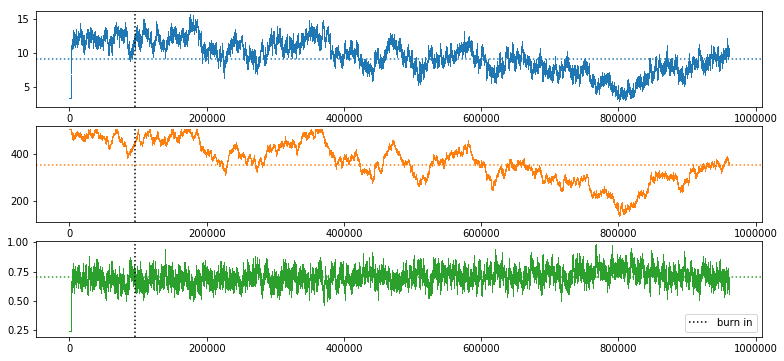

In [437]:
if ( fit_method == 2 ):
    
    n0 = int(Pv.shape[0]*0.1)
    M0_best = np.mean(Pv[n0:,0])
    Mmin_best = np.mean(Pv[n0:,1])
    alpha_best = np.mean(Pv[n0:,2])
    
    burnin = 0.1
    plt.figure(figsize=(13,6))
    plt.subplot(311)
    plt.plot(Pv[:,0], "C0,")
    plt.axvline(x=burnin*Pv.shape[0], color="k", ls=":")
    plt.axhline(y=M0_best, color="C0", ls=":")
    plt.subplot(312)
    plt.plot(Pv[:,1], "C1,")
    plt.axvline(x=burnin*Pv.shape[0], color="k", ls=":")
    plt.axhline(y=Mmin_best, color="C1", ls=":")
    plt.subplot(313)
    plt.plot(Pv[:,2], "C2,")
    plt.axvline(x=burnin*Pv.shape[0], color="k", ls=":", label="burn in")
    plt.axhline(y=alpha_best, color="C2", ls=":")
    plt.legend()
    plt.show()

In [438]:
popt=[M0_best, Mmin_best, alpha_best]
print (*popt)
#popt = [5, 400, 0.03]

9.110974317608887 354.182466198307 0.7046195337342791


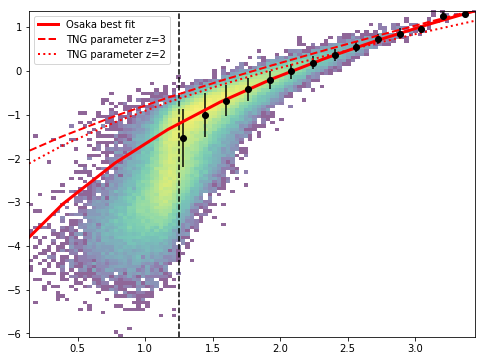

In [441]:
plt.figure(figsize=(8,6))
plt.hist2d(np.log10(GM_C200), np.log10(HIMass_indiv_exact), bins=[100,100], norm=mpl.colors.LogNorm(), alpha=0.6)
plt.axvline(x=np.log10(mass_comp_limit), color="k", ls="--")
plt.errorbar(np.log10(np.exp(dx0)), np.log10(np.exp(dy0)), np.log10(np.exp(ds0)), color="k", marker="o", ls="none")
tx = np.linspace(0,3.5,10)
lntx = np.log(10**tx)
plt.plot(tx, np.log10(np.exp(TNGfit(lntx,*popt))), "r-", lw=3, label="Osaka best fit")
p_TNG=[0.29, 6.7, 0.76]
plt.plot(tx, np.log10(np.exp(TNGfit(lntx,*p_TNG))), "r--", lw=2, label="TNG parameter z=3")
p_TNG=[1.3, 36, 0.6]
plt.plot(tx, np.log10(np.exp(TNGfit(lntx,*p_TNG))), "r:", lw=2, label="TNG parameter z=2")
plt.legend()
plt.show()

/home/atsushi/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


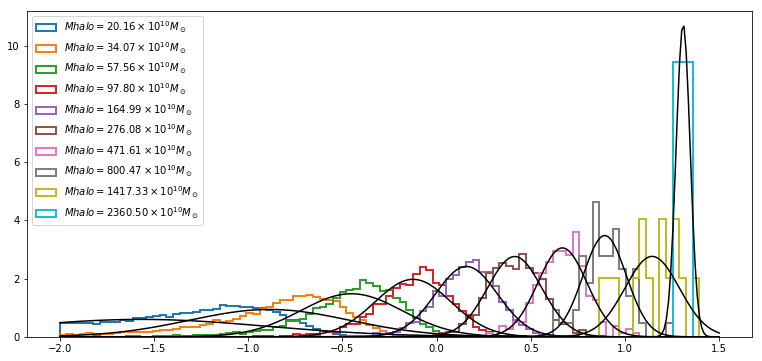

In [446]:
#
# derive conditional probability P(M_HI | M_halo)
#
%matplotlib inline
x = np.log10(GM_C200)
y = np.log10(HIMass_indiv_exact)
Nbin = 10
MHalo_bins = np.linspace(1.2,3.5,Nbin+1)
MHI_bins = np.linspace(-2,1.5, 100)
tx = np.linspace(MHI_bins[0], MHI_bins[-1],300)
fig = plt.figure(figsize=(13,6))
for i in range(Nbin):
    m = (x>MHalo_bins[i])&(x<=MHalo_bins[i+1])
    mean = np.mean(x[m])
    plt.hist(y[m], bins=MHI_bins, label=r"$Mhalo=%.2f \times 10^{10}M_\odot$"%(10**mean), normed=True, histtype="step", lw=2)
    plt.plot(tx, np.exp(-(tx-np.mean(y[m]))**2/np.var(y[m])/2)/np.sqrt(2*np.pi*np.var(y[m])), "k-")
plt.legend(loc="upper left")
plt.show()